In [1]:
import pandas as pd


In [2]:

import os
os.getcwd()

'C:\\Users\\sharo'

In [4]:

os.chdir('C:\\vcu extra\\assignment\\data')

In [5]:
ipl_bbb = pd.read_csv('C:\\vcu extra\\assignment\\data\\IPL_ball_by_ball_updated till 2024.csv',low_memory=False)

In [6]:
grouped_data = ipl_bbb.groupby(['Season', 'Innings No', 'Striker','Bowler']).agg({'runs_scored': sum, 'wicket_confirmation':sum}).reset_index()

C:\Users\sharo\AppData\Local\Temp\ipykernel_16272\1762907577.py:1: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  grouped_data = ipl_bbb.groupby(['Season', 'Innings No', 'Striker','Bowler']).agg({'runs_scored': sum, 'wicket_confirmation':sum}).reset_index()
C:\Users\sharo\AppData\Local\Temp\ipykernel_16272\1762907577.py:1: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  grouped_data = ipl_bbb.groupby(['Season', 'Innings No', 'Striker','Bowler']).agg({'runs_scored': sum, 'wicket_confirmation':sum}).reset_index()


In [7]:
player_runs = grouped_data.groupby(['Season', 'Striker'])['runs_scored'].sum().reset_index()
player_wickets = grouped_data.groupby(['Season', 'Bowler'])['wicket_confirmation'].sum().reset_index()

**a) NSS068 data multiple regression**

In [9]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [10]:
data = pd.read_csv("C:\\vcu extra\\assignment\\data\\NSSO68.csv",low_memory=False)

In [11]:
print(data['state_1'].unique())

['GUJ' 'ORI' 'CHTSD' 'MP' 'JRKD' 'WB' 'AP' 'MH' 'D&D' 'D&NH' 'MIZ' 'TRPR'
 'MANPR' 'ASSM' 'MEG' 'NAG' 'A&N' 'PNDCRY' 'TN' 'GOA' 'KA' 'KE' 'LKSDP'
 'SKM' 'Bhr' 'UP' 'RJ' 'ARP' 'DL' 'HR' 'Pun' 'HP' 'UT' 'Chandr' 'J$K']


In [12]:
data.shape

(101662, 384)

In [14]:
data[data['state_1']=='KA']

,slno,grp,Round_Centre,FSU_number,Round,Schedule_Number,Sample,Sector,state,State_Region,...,pickle_v,sauce_jam_v,Othrprocessed_v,Beveragestotal_v,foodtotal_v,foodtotal_q,state_1,Region,fruits_df_tt_v,fv_tot
23109,23110,4.61E+31,1,46141,68,10,1,2,29,294,...,0.003571,0.0,0.0,17.860714,373.986857,17.925351,KA,4,20.642857,61.685714
23110,23111,4.61E+31,1,46141,68,10,1,2,29,294,...,0.001667,0.0,0.0,6.668333,676.954000,25.517352,KA,4,25.333333,137.433333
23111,23112,4.61E+31,1,46141,68,10,1,2,29,294,...,0.000000,0.0,0.0,7.000000,652.801800,25.470640,KA,4,28.800000,124.296000
23112,23113,4.61E+31,1,46141,68,10,1,2,29,294,...,0.002000,0.0,0.0,0.002000,680.976667,29.984010,KA,4,87.000000,223.453333
23113,23114,4.61E+31,1,46141,68,10,1,2,29,294,...,0.004800,0.0,0.0,11.604800,516.512000,17.760602,KA,4,7.800000,62.096000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64086,64087,7.37E+31,1,73699,68,10,1,1,29,294,...,0.000000,0.0,0.0,13.333333,383.589333,16.200258,KA,4,11.983333,70.220000
64087,64088,7.37E+31,1,73699,68,10,1,1,29,294,...,0.000000,0.0,0.0,7.500000,668.425250,24.787846,KA,4,50.250000,188.650000
64088,64089,7.37E+31,1,73699,68,10,1,1,29,294,...,0.000000,0.0,0.0,3.333333,401.236500,15.100283,KA,4,21.083333,94.466667
64089,64090,7.37E+31,1,73699,68,10,1,1,29,294,...,0.000000,0.0,0.0,2.500000,365.097625,16.175296,KA,4,27.612500,79.827500


In [15]:
subset_data = data[['foodtotal_q', 'MPCE_MRP', 'Age', 'Meals_At_Home', 'Possess_ration_card', 'Education', 'No_of_Meals_per_day']]

In [16]:
subset_data.head()

,foodtotal_q,MPCE_MRP,Age,Meals_At_Home,Possess_ration_card,Education,No_of_Meals_per_day
0,30.942394,3662.65,50,59.0,1.0,8.0,2.0
1,29.286153,5624.51,40,56.0,1.0,12.0,2.0
2,31.527046,3657.18,45,60.0,1.0,7.0,2.0
3,27.834607,3260.37,75,60.0,1.0,6.0,2.0
4,27.600713,2627.54,30,59.0,1.0,7.0,2.0


In [17]:

subset_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101662 entries, 0 to 101661
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   foodtotal_q          101662 non-null  float64
 1   MPCE_MRP             101662 non-null  float64
 2   Age                  101662 non-null  int64  
 3   Meals_At_Home        100443 non-null  float64
 4   Possess_ration_card  101649 non-null  float64
 5   Education            101655 non-null  float64
 6   No_of_Meals_per_day  101637 non-null  float64
dtypes: float64(6), int64(1)
memory usage: 5.4 MB


In [18]:
print(subset_data['MPCE_MRP'].isna().sum())
print(subset_data['Age'].isna().sum())
print(subset_data['Possess_ration_card'].isna().sum())
print(data['Education'].isna().sum())

0
0
13
7


In [19]:
def impute_with_mean(df, columns):
    for col in columns:
        df[col].fillna(df[col].mean(), inplace=True)
    return df

In [20]:
columns_to_impute = ['Education', 'MPCE_MRP', 'Age', 'Meals_At_Home', 'Possess_ration_card']


subset_data = impute_with_mean(subset_data, columns_to_impute)


subset_data = subset_data.replace([np.inf, -np.inf], np.nan)


subset_data.dropna(inplace=True)

C:\Users\sharo\AppData\Local\Temp\ipykernel_16272\3798086171.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)
C:\Users\sharo\AppData\Local\Temp\ipykernel_16272\3798086171.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col].fillna(df[col].mean(), inplace=True)


In [21]:

subset_data.isna().sum()

foodtotal_q            0
MPCE_MRP               0
Age                    0
Meals_At_Home          0
Possess_ration_card    0
Education              0
No_of_Meals_per_day    0
dtype: int64

In [22]:
X = subset_data[['MPCE_MRP', 'Age', 'Meals_At_Home', 'Possess_ration_card', 'Education']]
X = sm.add_constant(X) 

In [23]:

X.const.unique()

array([1.])

In [24]:
y = subset_data['foodtotal_q']

In [25]:

y

0         30.942394
1         29.286153
2         31.527046
3         27.834607
4         27.600713
            ...    
101657    28.441750
101658    25.490282
101659    25.800107
101660    30.220170
101661    26.157279
Name: foodtotal_q, Length: 101637, dtype: float64

In [26]:
X = subset_data[['MPCE_MRP', 'Age', 'Meals_At_Home', 'Possess_ration_card', 'Education']]
X = sm.add_constant(X)
y = subset_data['foodtotal_q']
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            foodtotal_q   R-squared:                       0.160
Model:                            OLS   Adj. R-squared:                  0.159
Method:                 Least Squares   F-statistic:                     3858.
Date:                Wed, 25 Jun 2025   Prob (F-statistic):               0.00
Time:                        12:30:14   Log-Likelihood:            -3.6905e+05
No. Observations:              101637   AIC:                         7.381e+05
Df Residuals:                  101631   BIC:                         7.382e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  15.8351    

In [27]:
vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)

coefficients = model.params

               feature        VIF
0                const  53.506122
1             MPCE_MRP   1.143809
2                  Age   1.089430
3        Meals_At_Home   1.035334
4  Possess_ration_card   1.092272
5            Education   1.179806


In [28]:

coefficients[0]

C:\Users\sharo\AppData\Local\Temp\ipykernel_16272\2035869409.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  coefficients[0]


15.835107460912145

In [29]:
equation = f"y = {round(coefficients.iloc[0], 2)}"
for i in range(1, len(coefficients)):
    equation += f" + {round(coefficients.iloc[i], 6)}*x{i}"
print(equation)

y = 15.84 + 0.001645*x1 + 0.078124*x2 + 0.052567*x3 + -2.41592*x4 + 0.122103*x5


In [30]:
coefficients.iloc[0]

15.835107460912145

In [31]:
f"y = {round(coefficients[0], 2)}"

C:\Users\sharo\AppData\Local\Temp\ipykernel_16272\1481302370.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f"y = {round(coefficients[0], 2)}"


'y = 15.84'

In [32]:
print(subset_data['MPCE_MRP'].head(1).values[0])
print(subset_data['Age'].head(1).values[0])
print(subset_data['Meals_At_Home'].head(1).values[0])
print(subset_data['Possess_ration_card'].head(1).values[0])
print(subset_data['Education'].head(1).values[0])
print(subset_data['foodtotal_q'].head(1).values[0])

3662.65
50
59.0
1.0
8.0
30.942394


**b1)ipl data analysis**

In [33]:
import pandas as pd


def lcs_score(s1, s2):
    n, m = len(s1), len(s2)
    if n == 0 or m == 0:
        return 0.0

    
    dp = [[0] * (m + 1) for _ in range(n + 1)]
    for i in range(1, n + 1):
        for j in range(1, m + 1):
            if s1[i - 1] == s2[j - 1]:
                dp[i][j] = dp[i - 1][j - 1] + 1
            else:
                dp[i][j] = max(dp[i - 1][j], dp[i][j - 1])

    lcs_length = dp[n][m]

    
    average_length = (n + m) / 2.0
    score = lcs_length / average_length

    return score


csv_path = "C:\\vcu extra\\assignment\\data\\IPL_ball_by_ball_updated till 2024.csv"
excel_path = "C:\\vcu extra\\assignment\\data\\IPL SALARIES 2024.xlsx"

ball_by_ball_df = pd.read_csv(csv_path)
salaries_df = pd.read_excel(excel_path)


player_runs1 = ball_by_ball_df.groupby('Striker')['runs_scored'].sum().to_dict()
striker_names = ball_by_ball_df['Striker'].unique()
player_names = salaries_df['Player'].unique()

striker_matches = []

for striker in striker_names:
    for player in player_names:
        score = lcs_score(striker, player)
        if score > 0.80:
            actual_player_name = max(player_runs1.keys(), key=lambda k: lcs_score(player, k))
            runs_scored = player_runs1.get(actual_player_name, 0)
            striker_matches.append({'Striker': striker, 'Player': player, 'Score': score, 'Runs_Scored': runs_scored})

striker_matches_df = pd.DataFrame(striker_matches)
striker_output_path = 'output_striker.csv'
striker_matches_df.to_csv(striker_output_path, index=False)


player_wickets1 = ball_by_ball_df.groupby('Bowler')['wicket_confirmation'].sum().to_dict()
bowler_names = ball_by_ball_df['Bowler'].unique()

bowler_matches = []

for bowler in bowler_names:
    for player in player_names:
        score = lcs_score(bowler, player)
        if score > 0.80:
            actual_player_name = max(player_wickets1.keys(), key=lambda k: lcs_score(player, k))
            wickets_confirmation = player_wickets1.get(actual_player_name, 0)
            bowler_matches.append({'Bowler': bowler, 'Player': player, 'Score': score, 'Wicket_Confirmation': wickets_confirmation})

bowler_matches_df = pd.DataFrame(bowler_matches)
bowler_output_path = 'output_bowler.csv'
bowler_matches_df.to_csv(bowler_output_path, index=False)

striker_output_path, bowler_output_path

C:\Users\sharo\AppData\Local\Temp\ipykernel_16272\908056773.py:30: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  ball_by_ball_df = pd.read_csv(csv_path)


('output_striker.csv', 'output_bowler.csv')

In [34]:
import pandas as pd

def calculate_striker_points(input_file: str, output_file: str):
   
    df_striker = pd.read_csv(input_file)
    
  
    df_striker['Points Scored'] = df_striker['Runs_Scored']
    

    df_striker.to_csv(output_file, index=False)
    print(f"Updated {output_file} with Points Scored for strikers.")

def calculate_bowler_points(input_file: str, output_file: str):
   
    df_bowler = pd.read_csv(input_file)
    
  
    df_bowler['Points Scored'] = df_bowler['Wicket_Confirmation'] * 25
    
   
    df_bowler.to_csv(output_file, index=False)
    print(f"Updated {output_file} with Points Scored for bowlers.")


calculate_striker_points('output_striker.csv', 'output_striker.csv')
calculate_bowler_points('output_bowler.csv', 'output_bowler.csv')

Updated output_striker.csv with Points Scored for strikers.
Updated output_bowler.csv with Points Scored for bowlers.


In [35]:
import pandas as pd


file_path = 'output_striker.csv'
df = pd.read_csv(file_path)


df.rename(columns={'Points Scored': 'Points for Batsman'}, inplace=True)


df.to_csv(file_path, index=False)

print(f"Renamed 'Points Scored' column to 'Points for Batsman' in '{file_path}'.")

Renamed 'Points Scored' column to 'Points for Batsman' in 'output_striker.csv'.


In [36]:
import pandas as pd


file_path = 'output_bowler.csv'
df = pd.read_csv(file_path)


df.rename(columns={'Points Scored': 'Points for Bowler'}, inplace=True)


df.to_csv(file_path, index=False)

print(f"Renamed 'Points Scored' column to 'Points for Bowler' in '{file_path}'.")

Renamed 'Points Scored' column to 'Points for Bowler' in 'output_bowler.csv'.


In [37]:
import pandas as pd


striker_df = pd.read_csv('output_striker.csv')
bowler_df = pd.read_csv('output_bowler.csv')


combined_df = pd.merge(striker_df, bowler_df, on='Player', how='outer', suffixes=('_Batsman', '_Bowler'))


combined_df['Points for Batsman'].fillna(0, inplace=True)
combined_df['Points for Bowler'].fillna(0, inplace=True)


for index, row in combined_df.iterrows():
    if pd.notna(row['Points for Batsman']) and pd.notna(row['Points for Bowler']):
        total_points = row['Points for Batsman'] + row['Points for Bowler']
        if row['Points for Batsman'] > 0 and row['Points for Bowler'] > 0:
            print(f"Match found, points for {row['Player']} = {total_points}")
        else:
            print(f"No match found, total points for {row['Player']} = {total_points}")
    else:
        total_points = row['Points for Batsman'] + row['Points_Bowler']
        print(f"No match found, total points for {row['Player']} = {total_points}")


combined_df['Total_Points'] = combined_df['Points for Batsman'] + combined_df['Points for Bowler']
combined_df.to_csv('combined_output.csv', index=False)

Match found, points for Abdul Samad = 595.0
No match found, total points for Abhishek Porel = 235.0
Match found, points for Abhishek Sharma = 1421.0
Match found, points for Adam Zampa = 765.0
Match found, points for Akash Deep = 219.0
Match found, points for Akash Madhwal = 554.0
Match found, points for Amit Mishra = 4956.0
Match found, points for Anmolpreet Singh = 659.0
Match found, points for Anmolpreet Singh = 659.0
No match found, total points for Anuj Rawat = 318.0
Match found, points for Arjun Tendulkar = 113.0
Match found, points for Arshdeep Singh = 1975.0
No match found, total points for Atharva Taide = 201.0
Match found, points for Avesh Khan (T) = 1756.0
No match found, total points for B. Sai Sudharsan = 925.0
No match found, total points for Dhruv Jurel = 254.0
No match found, total points for Faf Du Plessis = 4421.0
Match found, points for Fazalhaq Farooqi = 153.0
Match found, points for Harpreet  Brar = 816.0
Match found, points for Harshit Rana = 452.0
No match found, 

C:\Users\sharo\AppData\Local\Temp\ipykernel_16272\3454125916.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  combined_df['Points for Batsman'].fillna(0, inplace=True)
C:\Users\sharo\AppData\Local\Temp\ipykernel_16272\3454125916.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a cop

In [38]:
import pandas as pd


combined_output = pd.read_csv('combined_output.csv')


ipl_salaries = pd.read_excel("C:\\vcu extra\\assignment\\data\\IPL SALARIES 2024.xlsx")


player_salaries = ipl_salaries[['Player', 'Rs']]


salary_dict = dict(zip(player_salaries['Player'], player_salaries['Rs']))


combined_output['salary'] = float('nan')


for index, row in combined_output.iterrows():
    player_name = row['Player']
    if player_name in salary_dict:
        combined_output.at[index, 'salary'] = salary_dict[player_name]
        print(f"Player {player_name} matched with a salary of Rs {salary_dict[player_name]}")


combined_output.to_csv('combined_output_with_salaries.csv', index=False)

Player Abdul Samad matched with a salary of Rs 400
Player Abhishek Porel matched with a salary of Rs 20
Player Abhishek Sharma matched with a salary of Rs 650
Player Adam Zampa matched with a salary of Rs 150
Player Akash Deep matched with a salary of Rs 20
Player Akash Madhwal matched with a salary of Rs 20
Player Amit Mishra matched with a salary of Rs 50
Player Anmolpreet Singh matched with a salary of Rs 20
Player Anmolpreet Singh matched with a salary of Rs 20
Player Anuj Rawat matched with a salary of Rs 340
Player Arjun Tendulkar matched with a salary of Rs 30
Player Arshdeep Singh matched with a salary of Rs 400
Player Atharva Taide matched with a salary of Rs 20
Player Avesh Khan (T) matched with a salary of Rs 1000
Player B. Sai Sudharsan matched with a salary of Rs 20
Player Dhruv Jurel matched with a salary of Rs 20
Player Faf Du Plessis matched with a salary of Rs 700
Player Fazalhaq Farooqi matched with a salary of Rs 50
Player Harpreet  Brar matched with a salary of Rs 3

In [39]:
import pandas as pd


input_file = 'combined_output_with_salaries.csv'
output_file = 'combined_output_with_salaries - Copy.csv'


columns_to_keep = ['Player', 'Total_Points', 'salary']


df = pd.read_csv(input_file)


df_filtered = df[columns_to_keep]


df_filtered.to_csv(output_file, index=False)

print(f"Filtered data saved to {output_file}")

Filtered data saved to combined_output_with_salaries - Copy.csv


Mean Squared Error: 116443.14227554195
R^2 Score: -0.12047562146243651
Adjusted R^2 Score: -0.21384858991763944
Coefficients: [0.16274853]
Intercept: 157.11291112341002


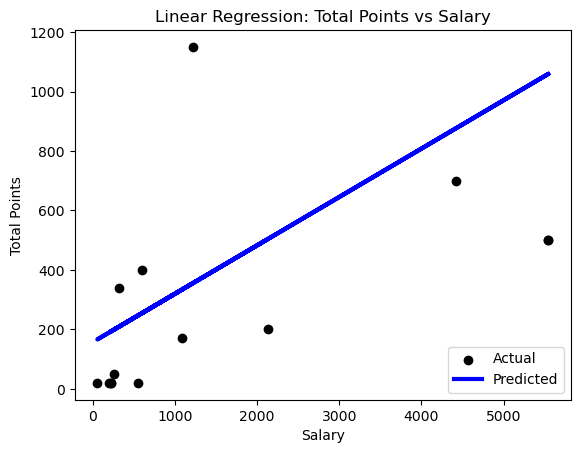

In [40]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt


file_path = 'combined_output_with_salaries - Copy.csv'
data = pd.read_csv(file_path)


y = data['salary'] 
X = data[['Total_Points']] 


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LinearRegression()


model.fit(X_train, y_train)


y_pred = model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


n = len(y_test)
p = X_test.shape[1]
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)


print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')
print(f'Adjusted R^2 Score: {adjusted_r2}')
print(f'Coefficients: {model.coef_}')
print(f'Intercept: {model.intercept_}')


plt.scatter(X_test, y_test, color='black', label='Actual')
plt.plot(X_test, y_pred, color='blue', linewidth=3, label='Predicted')
plt.xlabel('Salary')
plt.ylabel('Total Points')
plt.title('Linear Regression: Total Points vs Salary')
plt.legend()
plt.show()

#b2 ipl data analysis last 3 years

In [41]:
player_runs_2024 = player_runs[player_runs['Season']=='2024'].sort_values(by='runs_scored',ascending=False)
player_runs_2023 = player_runs[player_runs['Season']=='2023'].sort_values(by='runs_scored',ascending=False)
player_runs_2022 = player_runs[player_runs['Season']=='2022'].sort_values(by='runs_scored',ascending=False)

player_runs_last_three_seasons = pd.concat([player_runs_2024, player_runs_2023, player_runs_2022])
player_runs_last_three_seasons.sort_values(by='runs_scored',ascending=False)

,Season,Striker,runs_scored
2423,2023,Shubman Gill,890
2144,2022,JC Buttler,863
2313,2023,F du Plessis,730
2311,2023,DP Conway,672
2433,2023,V Kohli,639
...,...,...,...
2583,2024,TA Boult,0
2527,2024,Mukesh Kumar,0
2462,2024,Anmolpreet Singh,0
2560,2024,Ravi Bishnoi,0


In [42]:
player_wickets_2024 = player_wickets[player_wickets['Season']=='2024'].sort_values(by='wicket_confirmation',ascending=False)
player_wickets_2023 = player_wickets[player_wickets['Season']=='2023'].sort_values(by='wicket_confirmation',ascending=False)
player_wickets_2022 = player_wickets[player_wickets['Season']=='2022'].sort_values(by='wicket_confirmation',ascending=False)

player_wickets_last_three_seasons = pd.concat([player_wickets_2024, player_wickets_2023, player_wickets_2022])
player_wickets_last_three_seasons.sort_values(by='wicket_confirmation',ascending=False)

,Season,Bowler,wicket_confirmation
1750,2023,MM Sharma,31
1671,2022,YS Chahal,29
1755,2023,Mohammed Shami,28
1782,2023,Rashid Khan,28
1629,2022,PWH de Silva,27
...,...,...,...
1901,2024,S Joseph,0
1874,2024,Mukesh Choudhary,0
1879,2024,Naman Dhir,0
1895,2024,Ramandeep Singh,0


In [46]:

import os
import pandas as pd

os.chdir("C:\\vcu extra\\assignment\\Python")


sorted_df = player_wickets_last_three_seasons.sort_values(by='wicket_confirmation', ascending=False)
sorted_df1 = player_runs_last_three_seasons.sort_values(by='runs_scored', ascending=False)


sorted_df.to_csv('sorted_player_wickets.csv', index=False)
sorted_df1.to_csv('sorted_player_runs.csv', index=False)

print("DataFrame sorted and saved to 'sorted_player_wickets.csv'.")
print("DataFrame sorted and saved to 'sorted_player_runs.csv'.")

DataFrame sorted and saved to 'sorted_player_wickets.csv'.
DataFrame sorted and saved to 'sorted_player_runs.csv'.


In [48]:
import os
import pandas as pd


os.chdir("C:\\vcu extra\\assignment\\Python")


bowler_file_path = 'sorted_player_wickets.csv'  
bowler_data = pd.read_csv(bowler_file_path)


bowler_data.drop(columns=['Season'], inplace=True)


aggregated_bowler_data = bowler_data.groupby('Bowler')['wicket_confirmation'].sum().reset_index()


bowler_output_file_path = 'aggregated_player_wickets.csv'
aggregated_bowler_data.to_csv(bowler_output_file_path, index=False)

print(f"Aggregated bowler data saved to '{bowler_output_file_path}'.")


striker_file_path = 'sorted_player_runs.csv' 
striker_data = pd.read_csv(striker_file_path)


striker_data.drop(columns=['Season'], inplace=True)


aggregated_striker_data = striker_data.groupby('Striker')['runs_scored'].sum().reset_index()


striker_output_file_path = 'aggregated_player_runs.csv'
aggregated_striker_data.to_csv(striker_output_file_path, index=False)

print(f"Aggregated striker data saved to '{striker_output_file_path}'.")

Aggregated bowler data saved to 'aggregated_player_wickets.csv'.
Aggregated striker data saved to 'aggregated_player_runs.csv'.


In [51]:
import os
import pandas as pd


def lcs_score(s1, s2):
    n, m = len(s1), len(s2)
    if n == 0 or m == 0:
        return 0.0


    dp = [[0] * (m + 1) for _ in range(n + 1)]
    for i in range(1, n + 1):
        for j in range(1, m + 1):
            if s1[i - 1] == s2[j - 1]:
                dp[i][j] = dp[i - 1][j - 1] + 1
            else:
                dp[i][j] = max(dp[i - 1][j], dp[i][j - 1])

    lcs_length = dp[n][m]

   
    average_length = (n + m) / 2.0
    score = lcs_length / average_length

    return score


csv_path = 'aggregated_player_runs.csv'
excel_path = "C:\\vcu extra\\assignment\\data\\IPL SALARIES 2024.xlsx"

ball_by_ball_df = pd.read_csv(csv_path)
salaries_df = pd.read_excel(excel_path)


player_runs1 = ball_by_ball_df.groupby('Striker')['runs_scored'].sum().to_dict()
striker_names = ball_by_ball_df['Striker'].unique()
player_names = salaries_df['Player'].unique()

striker_matches = []

for striker in striker_names:
    for player in player_names:
        score = lcs_score(striker, player)
        if score > 0.80:
            actual_player_name = max(player_runs1.keys(), key=lambda k: lcs_score(player, k))
            runs_scored = player_runs1.get(actual_player_name, 0)
            striker_matches.append({'Striker': striker, 'Player': player, 'Score': score, 'Runs_Scored': runs_scored})


striker_matches_df = pd.DataFrame(striker_matches)
striker_output_dir = r"C:\\vcu extra\\assignment\\Python"
striker_output_path = os.path.join(striker_output_dir, 'output_striker.csv')
striker_matches_df.to_csv(striker_output_path, index=False)


csv_path1 = 'aggregated_player_wickets.csv'
ball_by_ball_df1 = pd.read_csv(csv_path1)
player_wickets1 = ball_by_ball_df1.groupby('Bowler')['wicket_confirmation'].sum().to_dict()
bowler_names = ball_by_ball_df1['Bowler'].unique()

bowler_matches = []

for bowler in bowler_names:
    for player in player_names:
        score = lcs_score(bowler, player)
        if score > 0.80:
            actual_player_name = max(player_wickets1.keys(), key=lambda k: lcs_score(player, k))
            wickets_confirmation = player_wickets1.get(actual_player_name, 0)
            bowler_matches.append({'Bowler': bowler, 'Player': player, 'Score': score, 'Wicket_Confirmation': wickets_confirmation})


bowler_matches_df = pd.DataFrame(bowler_matches)
bowler_output_path = os.path.join(striker_output_dir, 'output_bowler.csv')
bowler_matches_df.to_csv(bowler_output_path, index=False)

striker_output_path, bowler_output_path

('C:\\\\vcu extra\\\\assignment\\\\Python\\output_striker.csv',
 'C:\\\\vcu extra\\\\assignment\\\\Python\\output_bowler.csv')

In [52]:
import pandas as pd

def calculate_striker_points(input_file: str, output_file: str):
   
    df_striker = pd.read_csv(input_file)
    
   
    df_striker['Points Scored'] = df_striker['Runs_Scored']
    
   
    df_striker.to_csv(output_file, index=False)
    print(f"Updated {output_file} with Points Scored for strikers.")

def calculate_bowler_points(input_file: str, output_file: str):
  
    df_bowler = pd.read_csv(input_file)
    
   
    df_bowler['Points Scored'] = df_bowler['Wicket_Confirmation'] * 25
    
   
    df_bowler.to_csv(output_file, index=False)
    print(f"Updated {output_file} with Points Scored for bowlers.")


calculate_striker_points('output_striker.csv', 'output_striker.csv')
calculate_bowler_points('output_bowler.csv', 'output_bowler.csv')

Updated output_striker.csv with Points Scored for strikers.
Updated output_bowler.csv with Points Scored for bowlers.


In [57]:
import os
import pandas as pd

def calculate_striker_points(input_file: str, output_file: str):
   
    os.chdir("C:\\vcu extra\\assignment\\Python")
    
   
    df_striker = pd.read_csv(input_file)
    
 
    df_striker['Points Scored'] = df_striker['Runs_Scored']
    
    
    df_striker.to_csv(output_file, index=False)
    print(f"Updated {output_file} with Points Scored for strikers.")

def calculate_bowler_points(input_file: str, output_file: str):
    
    os.chdir("C:\\vcu extra\\assignment\\Python")
    
    
    df_bowler = pd.read_csv(input_file)
    
  
    df_bowler['Points Scored'] = df_bowler['Wicket_Confirmation'] * 25
    
   
    df_bowler.to_csv(output_file, index=False)
    print(f"Updated {output_file} with Points Scored for bowlers.")


calculate_striker_points('output_striker.csv', 'output_striker.csv')
calculate_bowler_points('output_bowler.csv', 'output_bowler.csv')

Updated output_striker.csv with Points Scored for strikers.
Updated output_bowler.csv with Points Scored for bowlers.


In [58]:
import pandas as pd


file_path = 'output_striker.csv'
df = pd.read_csv(file_path)


df.rename(columns={'Points Scored': 'Points for Batsman'}, inplace=True)


df.to_csv(file_path, index=False)

print(f"Renamed 'Points Scored' column to 'Points for Batsman' in '{file_path}'.")

Renamed 'Points Scored' column to 'Points for Batsman' in 'output_striker.csv'.


In [59]:
import pandas as pd


file_path = 'output_bowler.csv'
df = pd.read_csv(file_path)


df.rename(columns={'Points Scored': 'Points for Bowler'}, inplace=True)


df.to_csv(file_path, index=False)

print(f"Renamed 'Points Scored' column to 'Points for Bowler' in '{file_path}'.")

Renamed 'Points Scored' column to 'Points for Bowler' in 'output_bowler.csv'.


In [60]:
import pandas as pd


striker_df = pd.read_csv('output_striker.csv')
bowler_df = pd.read_csv('output_bowler.csv')


combined_df = pd.merge(striker_df, bowler_df, on='Player', how='outer', suffixes=('_Batsman', '_Bowler'))


combined_df['Points for Batsman'].fillna(0, inplace=True)
combined_df['Points for Bowler'].fillna(0, inplace=True)


for index, row in combined_df.iterrows():
    if pd.notna(row['Points for Batsman']) and pd.notna(row['Points for Bowler']):
        total_points = row['Points for Batsman'] + row['Points for Bowler']
        if row['Points for Batsman'] > 0 and row['Points for Bowler'] > 0:
            print(f"Match found, points for {row['Player']} = {total_points}")
        else:
            print(f"No match found, total points for {row['Player']} = {total_points}")
    else:
        total_points = row['Points for Batsman'] + row['Points_Bowler']
        print(f"No match found, total points for {row['Player']} = {total_points}")


combined_df['Total_Points'] = combined_df['Points for Batsman'] + combined_df['Points for Bowler']
combined_df.to_csv('combined_output.csv', index=False)

No match found, total points for Abdul Samad = 321.0
No match found, total points for Abhishek Porel = 235.0
Match found, points for Abhishek Sharma = 1005.0
Match found, points for Adam Zampa = 235.0
Match found, points for Akash Deep = 219.0
Match found, points for Akash Madhwal = 554.0
Match found, points for Amit Mishra = 219.0
No match found, total points for Anmolpreet Singh = 118.0
No match found, total points for Anuj Rawat = 318.0
Match found, points for Arjun Tendulkar = 113.0
Match found, points for Arshdeep Singh = 1123.0
No match found, total points for Atharva Taide = 201.0
Match found, points for Avesh Khan (T) = 947.0
No match found, total points for B. Sai Sudharsan = 925.0
No match found, total points for Dhruv Jurel = 254.0
No match found, total points for Faf Du Plessis = 1486.0
Match found, points for Fazalhaq Farooqi = 153.0
Match found, points for Harpreet  Brar = 607.0
Match found, points for Harshit Rana = 452.0
No match found, total points for Ishan Kishan = 1

C:\Users\sharo\AppData\Local\Temp\ipykernel_16272\3454125916.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  combined_df['Points for Batsman'].fillna(0, inplace=True)
C:\Users\sharo\AppData\Local\Temp\ipykernel_16272\3454125916.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a cop

In [62]:
import os
import pandas as pd


combined_output = pd.read_csv('combined_output.csv')


ipl_salaries = pd.read_excel("C:\\vcu extra\\assignment\\data\\IPL SALARIES 2024.xlsx")


player_salaries = ipl_salaries[['Player', 'Rs']]


salary_dict = dict(zip(player_salaries['Player'], player_salaries['Rs']))


combined_output['salary'] = float('nan')


for index, row in combined_output.iterrows():
    player_name = row['Player']
    if player_name in salary_dict:
        combined_output.at[index, 'salary'] = salary_dict[player_name]
        print(f"Player {player_name} matched with a salary of Rs {salary_dict[player_name]}")


os.chdir("C:\\vcu extra\\assignment\\data")


output_file_path = 'combined_output_with_salaries.csv'
combined_output.to_csv(output_file_path, index=False)

print(f"Updated DataFrame with salaries saved to '{output_file_path}'.")

Player Abdul Samad matched with a salary of Rs 400
Player Abhishek Porel matched with a salary of Rs 20
Player Abhishek Sharma matched with a salary of Rs 650
Player Adam Zampa matched with a salary of Rs 150
Player Akash Deep matched with a salary of Rs 20
Player Akash Madhwal matched with a salary of Rs 20
Player Amit Mishra matched with a salary of Rs 50
Player Anmolpreet Singh matched with a salary of Rs 20
Player Anuj Rawat matched with a salary of Rs 340
Player Arjun Tendulkar matched with a salary of Rs 30
Player Arshdeep Singh matched with a salary of Rs 400
Player Atharva Taide matched with a salary of Rs 20
Player Avesh Khan (T) matched with a salary of Rs 1000
Player B. Sai Sudharsan matched with a salary of Rs 20
Player Dhruv Jurel matched with a salary of Rs 20
Player Faf Du Plessis matched with a salary of Rs 700
Player Fazalhaq Farooqi matched with a salary of Rs 50
Player Harpreet  Brar matched with a salary of Rs 380
Player Harshit Rana matched with a salary of Rs 20
P

In [63]:
import os
import pandas as pd


input_file = 'combined_output_with_salaries.csv'
output_file = 'combined_output_with_salaries - Copy.csv'


columns_to_keep = ['Player', 'Total_Points', 'salary']


df = pd.read_csv(input_file)


df_filtered = df[columns_to_keep]


df_filtered.to_csv(output_file, index=False)

print(f"Filtered data saved to '{output_file}'.")

Filtered data saved to 'combined_output_with_salaries - Copy.csv'.


Mean Squared Error: 76369.6226480892
R^2 Score: 0.1968522116878728
Adjusted R^2 Score: 0.12992322932852884
Coefficients: [0.63841571]
Intercept: 23.714460656558913


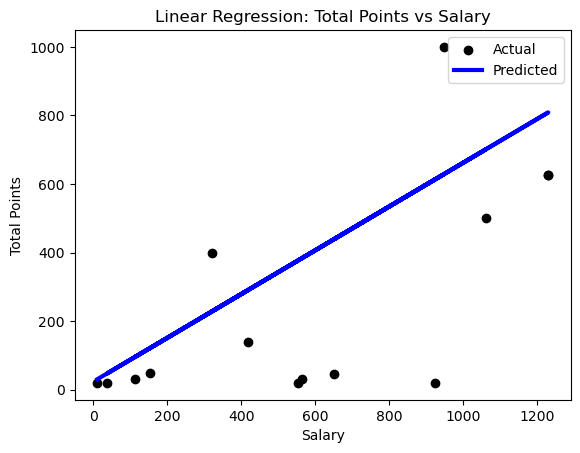

In [64]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt


file_path = 'combined_output_with_salaries - Copy.csv'
data = pd.read_csv(file_path)

y = data['salary'] 
X = data[['Total_Points']] 


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LinearRegression()


model.fit(X_train, y_train)


y_pred = model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


n = len(y_test)
p = X_test.shape[1]
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)


print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')
print(f'Adjusted R^2 Score: {adjusted_r2}')
print(f'Coefficients: {model.coef_}')
print(f'Intercept: {model.intercept_}')


plt.scatter(X_test, y_test, color='black', label='Actual')
plt.plot(X_test, y_pred, color='blue', linewidth=3, label='Predicted')
plt.xlabel('Salary')
plt.ylabel('Total Points')
plt.title('Linear Regression: Total Points vs Salary')
plt.legend()
plt.show()